# NFA Basics

You may wish to watch Ganesh's lecture on NFA a little, then play with the
code below, and then finish watching.

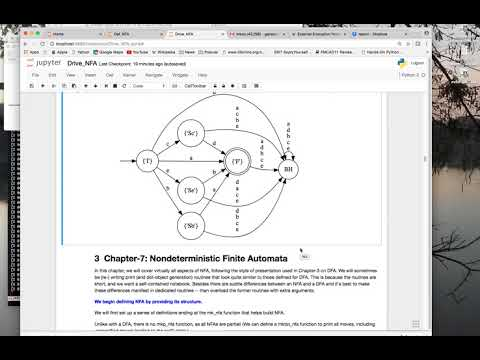

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eq

# This NFA checks whether a string has "01" in it.

In [3]:
nfahas01 = md2mc('''
NFA 
I : 0 | 1 -> I
I : '' -> A
A : 0  -> B
B : 1  -> C
C : 0 | 1 -> C
C : '' -> F
''')

Generating LALR tables


## This example is highly worth studying via animations.

Put it in animate mode, and then single-step to see the EClosure of states

In [4]:
AnimateNFA(nfahas01, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

# This is an example from Figure 7.7 of the book.

Presented in two different ways: one with a single initial state, and 
another with multiple initial states. Fig77 is the single initial state version, and
Fig77a is with multiple initial states.

In [5]:
Fig77 = md2mc('''NFA
I : '' -> A, G
A : '' -> B, C
G : 1  -> F
B : 1  -> D
C : 0  -> E
D : '' -> A, G
E : '' -> A, G
''')

In [6]:
AnimateNFA(Fig77, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

In [7]:
Fig77a = md2mc('''NFA
IA : '' -> B, C
IG : 1  -> F
B : 1  -> D
C : 0  -> E
D : '' -> IA, IG
E : '' -> IA, IG
''')

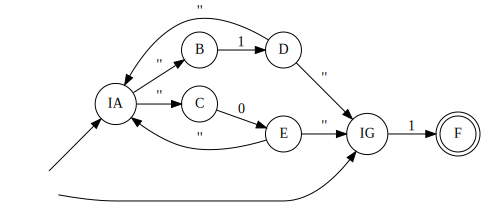

In [8]:
dotObj_nfa(Fig77a)

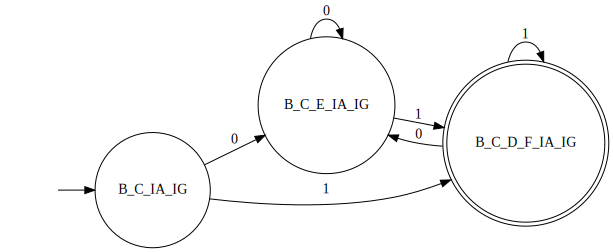

In [9]:
dotObj_dfa(nfa2dfa(Fig77a, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [10]:
# Our automd markdown works for NFA also. Here is the NFA for
# the language "ends in 0101"

NFA_ends0101 = md2mc(''' 
!!---------------------------------------------------------------------------
!! This NFA looks for patterns of the form 
!!
!!     ......<some 0's and 1's>.....0101
!!
!! i.e., all strings that end in 0101.
!!
!! This example (over and above thirdlastis1.nfa) also illustrates
!! the power of nondeterminism. Anytime we see a 0 from state I, we
!! can have the NFA speculate that it is seeing the beginning of a
!! 0101 pattern! If the NFA fails in its guess, it pays no price
!! (because another guess is soon coming from behind).
!!
!! * We take 4 states in the NFA solution. The DFA solution takes
!!   5 states.
!!
!! * This shows how burden is shifted from the
!!   human to the computer doing the NFA simulation.
!!   Even though the savings in states is not dramatic,
!!   the effort to build this NFA is much lower than building
!!   the corresponding DFA.
!! 
!!-----------------------------------------------------------------
!! For NFA, each line can be as follows:
!!
!! State : in1 | in2 ...  ->  COmma, Separated, State, List  !! comment
!!-----------------------------------------------------------------

NFA

I    : 1   -> I      !! I goes to I upon 1

I    : 0   -> S0, I  !! I goes to S0 and I upon 0

S0   : 1   -> S01    !! S0 goes to S01 upon 1

S01  : 0   -> S010   !! S01 goes to S010 upon 0

S010 : 1   -> F      !! S010 goes to F upon F

!!---
''')

In [11]:
# Now let us see the dict version of the NFA
NFA_ends0101 

{'Delta': {('I', '0'): {'I', 'S0'},
  ('I', '1'): {'I'},
  ('S0', '1'): {'S01'},
  ('S01', '0'): {'S010'},
  ('S010', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S01', 'S010'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

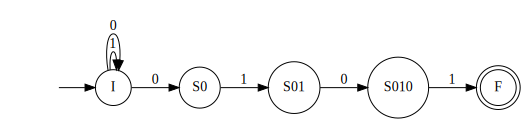

In [12]:
# Let's see the drawing of this NFA
dotObj_nfa(NFA_ends0101)  

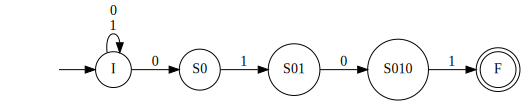

In [13]:
# The drawing produces separated self-loops. Let's fuse 'em.

# Now we are going to fuse the separate self-loops into one.

dotObj_nfa(NFA_ends0101, FuseEdges=True) 

In [27]:
step_nfa(NFA_ends0101, 'F', '1')

set()

# NFA for 3rd-last is 1

In [17]:
# Here is the automd (markdown) for an NF whose third-last symbol is a 1

NFA_3rdlast_1 = md2mc('''
NFA

I : 0  | 1  -> I  !! Upon a 0 or a 1, continue to stay in state I

I : ''      -> S0 !! Nondeterministically transition to state S0

S0 : 1      -> S1 !! This is the key "1" (third-last being 1) seen

S1 : 0 | 1  -> S2 !! One 0/1 takes the NFA to S2

S2 : 0 | 1  -> F  !! One more 0/1 takes the NFA to F

''')

In [18]:
# Let us see its internal representation:
NFA_3rdlast_1

{'Delta': {('I', ''): {'S0'},
  ('I', '0'): {'I'},
  ('I', '1'): {'I'},
  ('S0', '1'): {'S1'},
  ('S1', '0'): {'S2'},
  ('S1', '1'): {'S2'},
  ('S2', '0'): {'F'},
  ('S2', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S1', 'S2'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

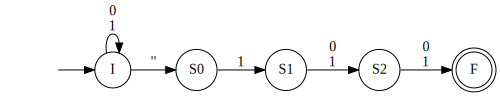

In [19]:
# Let us see this NFA drawn out:
dotObj_nfa(NFA_3rdlast_1, FuseEdges=True)

In [20]:
# Let's step the NFA on epsilon:   
step_nfa(NFA_3rdlast_1, "I", "")

{'S0'}

In [21]:
# Let's step it on '0': 
step_nfa(NFA_3rdlast_1, "I", "0")

{'I'}

In [22]:
# Step it on a "1" to see two next states. That shows nondeterminism!
step_nfa(NFA_3rdlast_1, "I", "1")  

{'I'}

In [28]:
# What is the Eclosure of the set of states {I} ?
Eclosure(NFA_3rdlast_1, {"I"})

{'I', 'S0'}

In [29]:
help(accepts_nfa)

Help on function accepts_nfa in module jove.Def_NFA:

accepts_nfa(N, s, chatty=False)
    NFA acceptance.
    Input : N : given NFA
            s : given string
            chatty : Boolean (prints accepting path,
                     which is the state-sets encountered).



In [30]:
accepts_nfa(NFA_3rdlast_1, "0100100", chatty=True)

States reached =  {'S0', 'I'}
States reached =  {'S0', 'I', 'S1'}
States reached =  {'S0', 'I', 'S2'}
States reached =  {'S0', 'I', 'F'}
States reached =  {'S0', 'I', 'S1'}
States reached =  {'S0', 'I', 'S2'}
States reached =  {'S0', 'I', 'F'}
NFA accepts '0100100' by reaching {'S0', 'I', 'F'}


True

# Let us run NFA interactively via widgets

We have two NFA to play with, namely nfa_ends0101 and NFA_3rdlast_1


In [31]:
import ipywidgets as wdg
def run_nfa_slider(N, s, n):
    """Run NFA N from N["Q0"] (which is a set..) on substring s[0:n]
    """
    S = N["Q0"] 
    if (n > len(s)):
        n = len(s)
    print("string = ", s[0:n])
    run_nfa(N, S, s[0:n], True)
    
def run_nfa_int(N1, N2):
    """Run interactively from the given NFA .. from {q0} 
       on input string's substring
       as picked by slider.
    """
    inp = input("Please provide string: ")
    wdg.interact(run_nfa_slider, N = {'N1': N1, 'N2': N2}, 
                 s = inp, n=(0,32))
    
def test_run_nfa_int(N1, N2):
    """Test the interactive run of NFA.
    """
    run_nfa_int(N1, N2)

#-- enable this later. test_run_nfa_int()

## Once you run the command below, provide a string

Provide a string of 0's and 1's. Then you can use the pull-down to pick the NFA
to test, and the slider to incrementally consume more of the input string.


In [32]:
test_run_nfa_int(NFA_ends0101, NFA_3rdlast_1)

Please provide string: 0010110


interactive(children=(Dropdown(description='N', options={'N1': {'Q': {'F', 'S0', 'I', 'S010', 'S01'}, 'Sigma':…